In [1]:
import pandas as pd 
import glob

# path = './'
# all_files = glob.glob(path + "/*.csv")

# df = []

# for filename in all_files:
#     individual_df = pd.read_csv(filename, index_col=None, header=0)
#     df.append(individual_df)

# df = pd.concat(df, axis=0, ignore_index=True)
pobreza = pd.read_csv('./Ecuador pobreza y desigualdad.csv', index_col=None)
movilidad = pd.read_csv('./level_1_ec.csv',index_col=None, header=0)

In [2]:
df = movilidad.groupby(by='name_1').mean().reset_index()

In [3]:
df = pd.merge(df,pobreza,left_on='name_1',right_on='Unnamed: 1')

In [4]:
df = df[['name_1','Unnamed: 4','mobilitychange']]
df = df.rename(columns={'name_1':'provincia','Unnamed: 4':'poverty'})

In [5]:
df= df.set_index('provincia')

In [6]:
df['poverty'] = df['poverty'].astype('float')
df['mobilitychange'] = df['mobilitychange'].astype('float')

In [7]:
import seaborn as sns

In [8]:
df = df.join(pd.cut(df['poverty'],bins=4),rsuffix='_grade')

In [9]:
def replace(interval):
    if interval == df['poverty_grade'][8]:
        return 1
    elif interval == df['poverty_grade'][0]:
        return 2
    elif interval == df['poverty_grade'][1]:
        return 3
    else:
        return 4

In [10]:
df['poverty_grade']

provincia
Azuay                (14.665, 29.329]
Bolivar              (29.329, 43.994]
Carchi               (29.329, 43.994]
Cañar                (29.329, 43.994]
Chimborazo           (43.994, 58.659]
Cotopaxi             (43.994, 58.659]
El Oro               (14.665, 29.329]
Esmeraldas           (29.329, 43.994]
Galápagos           (-0.0587, 14.665]
Galápagos           (-0.0587, 14.665]
Galápagos           (-0.0587, 14.665]
Galápagos           (-0.0587, 14.665]
Guayas               (14.665, 29.329]
Imbabura             (29.329, 43.994]
Loja                 (29.329, 43.994]
Los Rios             (29.329, 43.994]
Manabi               (29.329, 43.994]
Morona Santiago      (43.994, 58.659]
Napo                 (43.994, 58.659]
Orellana             (29.329, 43.994]
Pastaza              (43.994, 58.659]
Pichincha           (-0.0587, 14.665]
Santa Elena          (29.329, 43.994]
Sucumbios            (29.329, 43.994]
Tungurahua           (14.665, 29.329]
Zamora Chinchipe     (29.329, 43.994]
Na

In [11]:
df['grade'] = df['poverty_grade'].apply(replace)

/home/alina/anaconda3/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='poverty', ylabel='mobilitychange'>

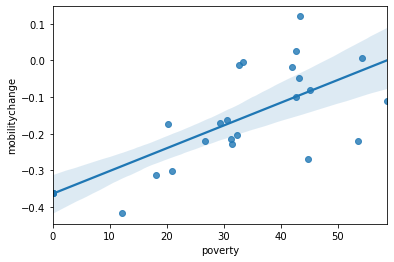

In [12]:
import matplotlib.pyplot as plt
sns.regplot(df['poverty'],df['mobilitychange'])

/home/alina/anaconda3/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


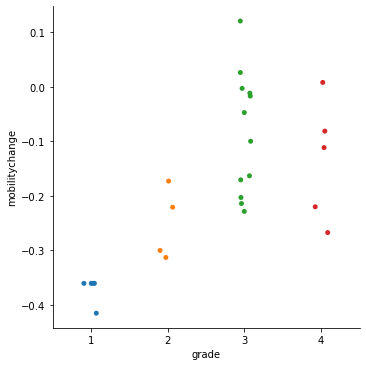

In [13]:
import matplotlib.pyplot as plt
sns.catplot(df['grade'],df['mobilitychange'],data=df)

In [16]:
import scipy.stats
scipy.stats.pearsonr(df['poverty'], df['mobilitychange'])

(0.7417352689745431, 1.448250875174889e-05)

In [17]:
scipy.stats.spearmanr(df['poverty'], df['mobilitychange'])

SpearmanrResult(correlation=0.7289879931389365, pvalue=2.400124993336367e-05)

In [29]:
df1 = df[df['grade']==4]
df1
#df.iloc[[df1['mobilitychange']].max(),'provincia']

,poverty,mobilitychange,poverty_grade,grade
provincia,,,,
Chimborazo,53.499872,-0.220234,"(43.994, 58.659]",4
Cotopaxi,45.148075,-0.081401,"(43.994, 58.659]",4
Morona Santiago,58.658743,-0.111630,"(43.994, 58.659]",4
Napo,54.152693,0.007973,"(43.994, 58.659]",4
Pastaza,44.671433,-0.267575,"(43.994, 58.659]",4


# Regiones

In [202]:
noroeste = pd.read_excel('./Regiones/Noroeste.xlsx', index_col=None)
noreste = pd.read_excel('./Regiones/Noreste.xlsx', index_col=None)
centronorte = pd.read_excel('./Regiones/Centronorte.xlsx', index_col=None)
este = pd.read_excel('./Regiones/Este.xlsx', index_col=None)
oeste = pd.read_excel('./Regiones/Oeste.xlsx', index_col=None)
sureste = pd.read_excel('./Regiones/Sureste.xlsx', index_col=None)
suroeste = pd.read_excel('./Regiones/Suroeste.xlsx', index_col=None)
centrosur = pd.read_excel('./Regiones/Centrosur.xlsx', index_col=None)

In [203]:
def join_claves(df):
    df['clave_mun'] = df['cve_ent'] 
    for i in range(len(df.index)):
        df.loc[i,'clave_mun'] = str(df.loc[i,'cve_ent']) + '0'*(3-len(str(df.loc[i,'cve_mun']))) + str(df.loc[i,'cve_mun'])  
    return pd.DataFrame(df['clave_mun'],columns=['clave_mun'])


In [204]:
noroeste = join_claves(noroeste).astype('int')
noreste = join_claves(noreste).astype('int')
centronorte = join_claves(centronorte).astype('int')
este = join_claves(este).astype('int')
oeste = join_claves(oeste).astype('int')
sureste = join_claves(sureste).astype('int')
suroeste = join_claves(suroeste).astype('int')
centrosur = join_claves(centrosur).astype('int')

In [205]:
df_new = df_new.reset_index()
df_new = df_new.rename(columns={'index':'clave_mun'}) 

In [206]:
def mergewith_dfnew(df):
    return df.merge(df_new,left_on='clave_mun',right_on='clave_mun',how='inner')

df_noroeste = mergewith_dfnew(noroeste)
df_noreste = mergewith_dfnew(noreste)
df_centronorte = mergewith_dfnew(centronorte)
df_oeste = mergewith_dfnew(oeste)
df_este = mergewith_dfnew(este)
df_centrosur = mergewith_dfnew(centrosur)
df_suroeste = mergewith_dfnew(suroeste)
df_sureste = mergewith_dfnew(sureste)

In [237]:
import numpy as np

/home/alina/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='indice_rezago', ylabel='Density'>

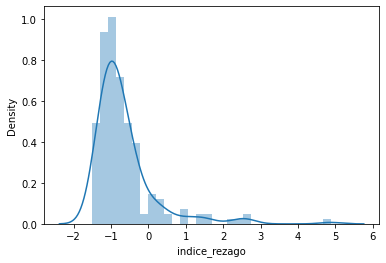

In [209]:
sns.distplot(df_noroeste['indice_rezago'])

/home/alina/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='mobilityChange', ylabel='Density'>

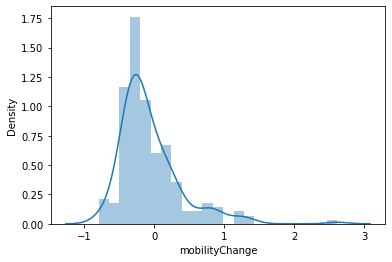

In [210]:
sns.distplot(df_noroeste['mobilityChange'])

## Noroeste

/home/alina/anaconda3/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='indice_rezago', ylabel='mobilityChange'>

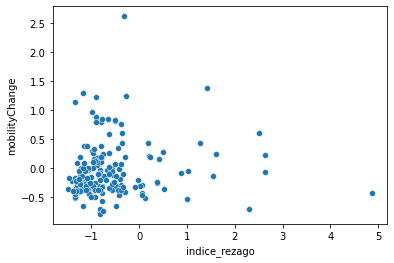

In [220]:
sns.scatterplot(df_noroeste['indice_rezago'],df_noroeste['mobilityChange'])

In [217]:
scipy.stats.spearmanr(df_noroeste['indice_rezago'], df_noroeste['mobilityChange'])

SpearmanrResult(correlation=0.19454050702672912, pvalue=0.007001585358595606)

/home/alina/anaconda3/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


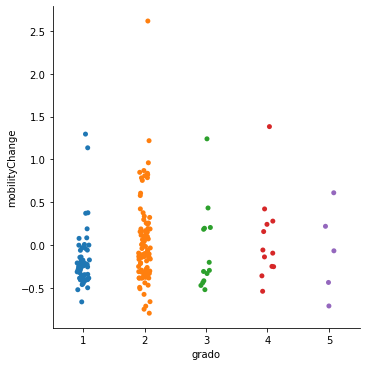

In [261]:
df_noroeste = df_noroeste.sort_values(by='grado')
sns.catplot(df_noroeste['grado'],df_noroeste['mobilityChange'],data=df_noroeste)

## Noreste

In [222]:
scipy.stats.spearmanr(df_noreste['indice_rezago'], df_noreste['mobilityChange'])

SpearmanrResult(correlation=0.4235073792486584, pvalue=5.712427007632966e-07)

/home/alina/anaconda3/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


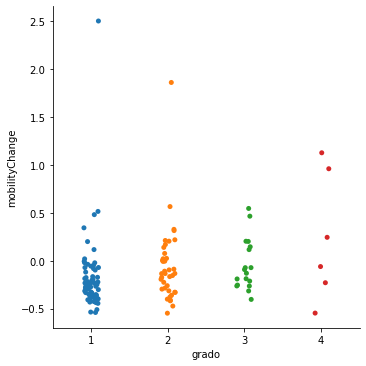

In [262]:
df_noreste = df_noreste.sort_values(by='grado')
sns.catplot(df_noreste['grado'],df_noreste['mobilityChange'],data=df_noreste)

## Centronorte

In [223]:
scipy.stats.spearmanr(df_centronorte['indice_rezago'], df_centronorte['mobilityChange'])

SpearmanrResult(correlation=0.14491370269645748, pvalue=0.046642512366117515)

/home/alina/anaconda3/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


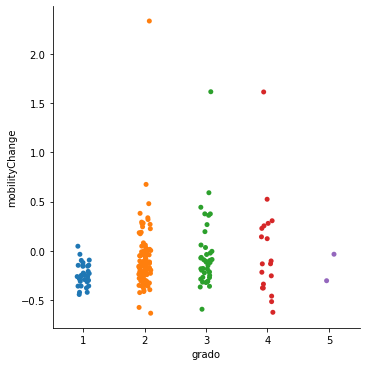

In [263]:
df_centronorte = df_centronorte.sort_values(by='grado')
sns.catplot(df_centronorte['grado'],df_centronorte['mobilityChange'],data=df_centronorte)

## Centrosur

In [224]:
scipy.stats.spearmanr(df_centrosur['indice_rezago'], df_centrosur['mobilityChange'])

SpearmanrResult(correlation=0.7772448979591836, pvalue=5.133349074164148e-11)

/home/alina/anaconda3/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


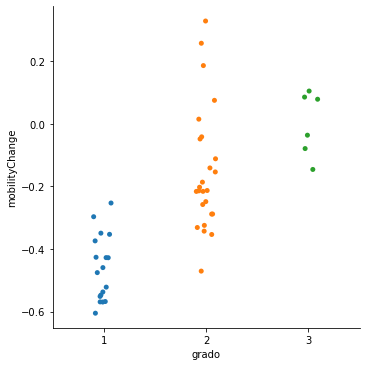

In [256]:
df_centrosur = df_centrosur.sort_values(by='grado')
sns.catplot(df_centrosur['grado'],df_centrosur['mobilityChange'],data=df_centrosur)

## Oeste

In [227]:
scipy.stats.spearmanr(df_oeste['indice_rezago'], df_oeste['mobilityChange'])

SpearmanrResult(correlation=0.23987015343066628, pvalue=7.291998881465029e-05)

In [252]:
df_oeste = df_oeste.sort_values(by='grado')

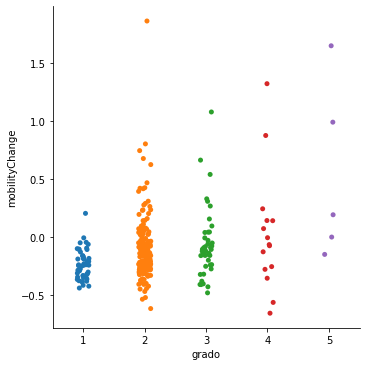

In [253]:
sns.catplot(x=df_oeste['grado'],y=df_oeste['mobilityChange'],data=df_oeste)

## Este

In [229]:
scipy.stats.spearmanr(df_este['indice_rezago'], df_este['mobilityChange'])

SpearmanrResult(correlation=0.3694225441713405, pvalue=1.3959388228403169e-19)

/home/alina/anaconda3/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


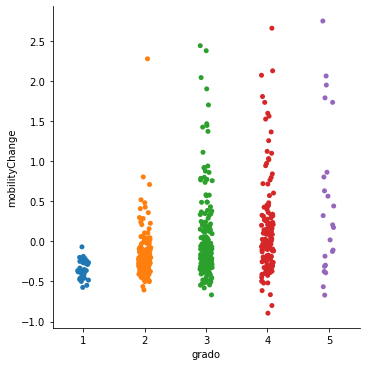

In [255]:
df_este = df_este.sort_values(by='grado')
sns.catplot(df_este['grado'],df_este['mobilityChange'],data=df_este)

## Suroeste

In [233]:
scipy.stats.spearmanr(df_suroeste['indice_rezago'], df_suroeste['mobilityChange'])

SpearmanrResult(correlation=0.15754955057314549, pvalue=0.00014859823475125587)

/home/alina/anaconda3/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


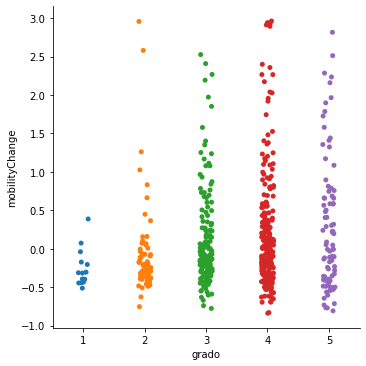

In [264]:
df_suroeste = df_suroeste.sort_values(by='grado')
sns.catplot(df_suroeste['grado'],df_suroeste['mobilityChange'],data=df_suroeste)

## Sureste

In [266]:
scipy.stats.spearmanr(df_sureste['indice_rezago'], df_sureste['mobilityChange'])

SpearmanrResult(correlation=0.050524423134551986, pvalue=0.5518541677480426)

/home/alina/anaconda3/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


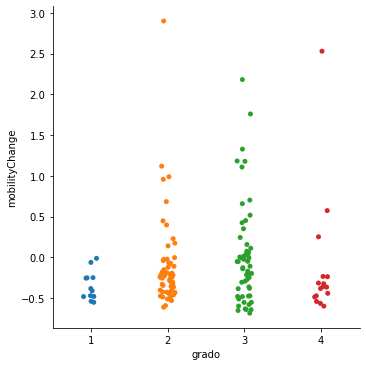

In [265]:
df_sureste = df_sureste.sort_values(by='grado')
sns.catplot(df_sureste['grado'],df_sureste['mobilityChange'],data=df_sureste)